Implementación y Comparación de Modelos con Regularización

## Introducción a la Actividad

**Objetivo:**

- Implementar modelos de regresión lineal, polinómica, Ridge y Lasso utilizando un conjunto de datos real.
- Comparar el rendimiento de los modelos y analizar el impacto de la regularización y la multicolinealidad.

**Objetivos específicos:**

- Cargar y explorar el dataset.
- Detectar y manejar la multicolinealidad.
- Implementar regresión lineal y polinómica.
- Aplicar Ridge y Lasso.
- Comparar resultados y extraer conclusiones.

## 1 - Carga y Exploración del Dataset

**Cargar el Dataset:**



In [ ]:
import pandas as pd

df= pd.read_csv('/content/datoslimpiosheloc.csv')

In [ ]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,CreditExperienceRatio,RevolvingPressureIndex
0,Bad,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,...,0.0,0.0,33.0,74.0,8.0,1.0,1.0,69.0,0.583333,22.77
1,Bad,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,15.0,...,0.0,0.0,0.0,74.0,0.0,2.0,1.0,0.0,0.706897,0.00
2,Bad,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,15.0,...,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0,0.363636,45.58
3,Bad,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,...,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0,0.431953,65.52
4,Bad,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,15.0,...,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0,0.396396,40.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RiskPerformance                     10459 non-null  object 
 1   ExternalRiskEstimate                10459 non-null  float64
 2   MSinceOldestTradeOpen               10459 non-null  float64
 3   MSinceMostRecentTradeOpen           10459 non-null  float64
 4   AverageMInFile                      10459 non-null  float64
 5   NumSatisfactoryTrades               10459 non-null  float64
 6   NumTrades60Ever2DerogPubRec         10459 non-null  float64
 7   NumTrades90Ever2DerogPubRec         10459 non-null  float64
 8   PercentTradesNeverDelq              10459 non-null  float64
 9   MSinceMostRecentDelq                10459 non-null  float64
 10  MaxDelq2PublicRecLast12M            10459 non-null  float64
 11  MaxDelqEver                         10459

In [ ]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,CreditExperienceRatio,RevolvingPressureIndex
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,72.056984,199.601300,9.386748,78.621952,21.058419,0.548714,0.363132,92.620805,18.309207,5.771584,...,1.430347,1.374797,34.424228,70.630557,4.023712,2.417726,1.081939,66.480926,0.446208,26.389980
std,9.585411,94.078096,12.620794,33.100716,11.001553,1.210884,0.968959,11.486962,14.834892,1.598590,...,2.077896,2.038377,27.849002,19.738786,2.925905,1.526271,1.447982,21.387886,0.739633,25.550587
min,33.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.031250,0.000000
25%,65.000000,140.000000,3.000000,58.000000,13.000000,0.000000,0.000000,90.000000,15.000000,6.000000,...,0.000000,0.000000,10.000000,67.000000,2.000000,1.000000,0.000000,50.000000,0.337058,5.200000
50%,72.000000,186.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.000000,15.000000,6.000000,...,1.000000,1.000000,29.000000,74.000000,3.000000,2.000000,1.000000,67.000000,0.408602,19.430000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,15.000000,7.000000,...,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000,0.495261,40.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000,69.000000,232.000000


In [ ]:
df['RiskPerformance'] = df['RiskPerformance'].map({'Good': 1, 'Bad': 0})

In [ ]:
# ExternalRiskEstimate


La variable objetivo es 'ExternalRiskEstimate	', una medida de la calidad del vino.

## 2 - Detección y Manejo de la Multicolinealidad

**Matriz de Correlación:**


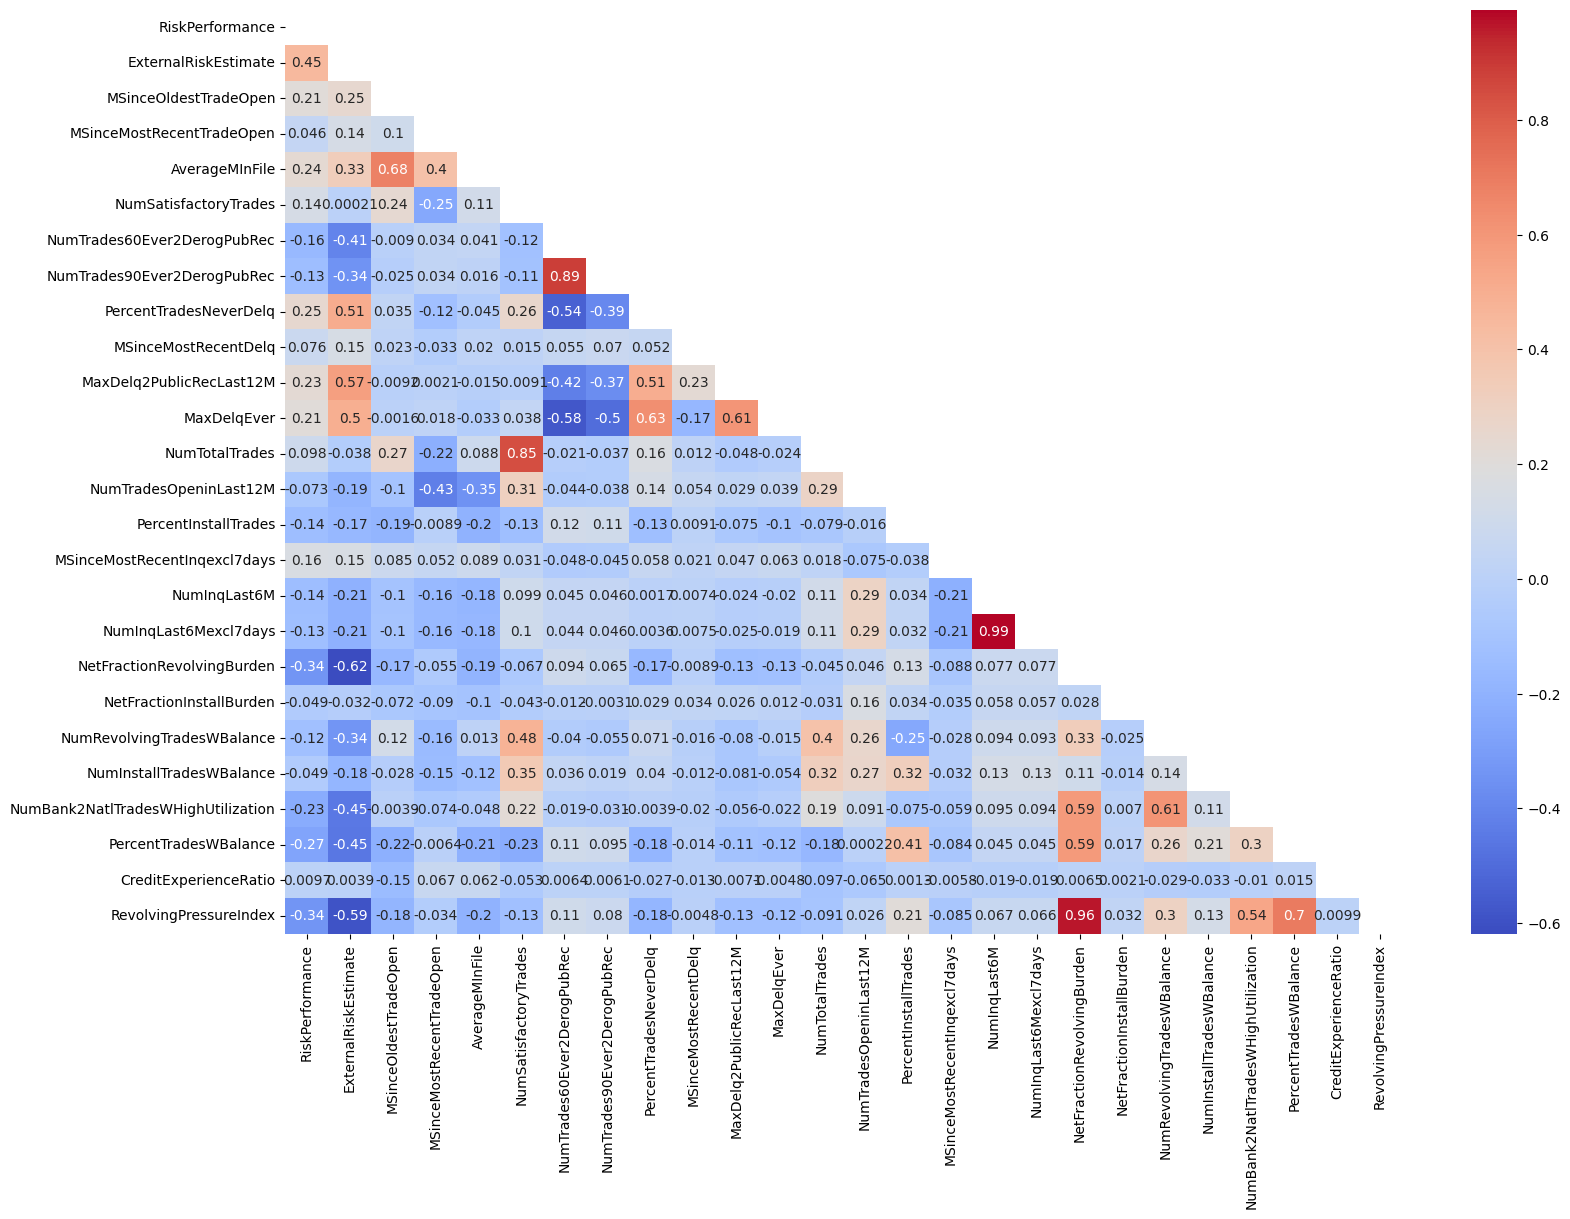

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot a correlation heatmap to visualize relationships between features with all labels
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#eliminar variables con alta correlacion
columns_to_drop = [
 'NumTrades60Ever2DerogPubRec',
 'NumSatisfactoryTrades',
 'NumInqLast6Mexcl7days',
 'RevolvingPressureIndex',
 'NumTrades90Ever2DerogPubRec',
 'NetFractionRevolvingBurden'
]

df = df.drop(columns=columns_to_drop)


hemos reducido el dataset a 20 columnas

**Análisis del VIF:**



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, threshold=5.0):
    """
    Calcula el VIF de las variables en un DataFrame y elimina iterativamente
    aquellas con un VIF superior al umbral especificado.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        threshold (float): El umbral de VIF para la eliminación.

    Returns:
        pd.DataFrame: El DataFrame con las variables de alto VIF eliminadas.
    """
    X = df.copy()
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print("VIF inicial:")
    print(vif_data)

    while True:
        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
            print(f"\nEliminando '{feature_to_remove}' con VIF = {max_vif:.2f}")
            X = X.drop(columns=[feature_to_remove])
            vif_data = pd.DataFrame()
            vif_data["feature"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
            print("\nNuevo VIF:")
            print(vif_data)
        else:
            break

    return X

# Aplicar la función a tu DataFrame (excluyendo la variable objetivo)
df_reduced_vif = calculate_vif(df.drop('ExternalRiskEstimate', axis=1), threshold=5.0)

print("\nDataFrame final después de eliminar variables con alto VIF:")
display(df_reduced_vif.head())

VIF inicial:
                               feature        VIF
0                      RiskPerformance   2.519179
1                MSinceOldestTradeOpen  12.666961
2            MSinceMostRecentTradeOpen   2.293115
3                       AverageMInFile  18.300000
4                NumSatisfactoryTrades  23.512631
5          NumTrades60Ever2DerogPubRec   6.703605
6          NumTrades90Ever2DerogPubRec   5.853254
7               PercentTradesNeverDelq  81.143844
8                 MSinceMostRecentDelq   3.299670
9             MaxDelq2PublicRecLast12M  28.657305
10                         MaxDelqEver  37.178001
11                      NumTotalTrades  15.767170
12              NumTradesOpeninLast12M   3.273218
13                PercentInstallTrades   8.301053
14        MSinceMostRecentInqexcl7days   1.266499
15                        NumInqLast6M  95.399364
16               NumInqLast6Mexcl7days  94.086703
17          NetFractionRevolvingBurden  43.808775
18            NetFractionInstallBurde

,RiskPerformance,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,NumTrades90Ever2DerogPubRec,MSinceMostRecentDelq,NumTradesOpeninLast12M,MSinceMostRecentInqexcl7days,NumInqLast6Mexcl7days,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,CreditExperienceRatio,RevolvingPressureIndex
0,0,144.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.583333,22.77
1,0,58.0,15.0,4.0,15.0,0.0,0.0,0.0,2.0,1.0,0.706897,0.00
2,0,66.0,5.0,0.0,15.0,4.0,0.0,4.0,2.0,1.0,0.363636,45.58
3,0,169.0,1.0,1.0,76.0,3.0,0.0,4.0,4.0,3.0,0.431953,65.52
4,0,333.0,27.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,0.396396,40.80


**El dataset se ha reducido a 10 variables independientes**



## 3 - Implementación de Modelos de Regresión

**Preparar los Datos:**



In [ ]:
from sklearn.model_selection import train_test_split

X = df_reduced_vif #drop('quality', axis=1) #no se necesita porque en la funcion anterior ya se eliminó la variable objetivo
y = df['ExternalRiskEstimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Regresión Lineal Simple:**



In [ ]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_scaled, y_train)
y_pred_lineal = modelo_lineal.predict(X_test_scaled)


**Regresión Polinómica:**



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_train_poly, y_train)
y_pred_polinomico = modelo_polinomico.predict(X_test_poly)


**Evaluación de Modelos:**



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_polinomico = mean_squared_error(y_test, y_pred_polinomico)
r2_polinomico = r2_score(y_test, y_pred_polinomico)

print(f"Regresión Lineal Simple - MSE: {mse_lineal:.2f}, R2: {r2_lineal:.2f}")
print(f"Regresión Polinómica - MSE: {mse_polinomico:.2f}, R2: {r2_polinomico:.2f}")

Regresión Lineal Simple - MSE: 38.46, R2: 0.58
Regresión Polinómica - MSE: 27.15, R2: 0.71


## 4 - Aplicación de Ridge y Lasso

**Regresión Ridge:**



In [ ]:
from sklearn.linear_model import Ridge

modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = modelo_ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


**Regresión Lasso:**



In [ ]:
from sklearn.linear_model import Lasso

modelo_lasso = Lasso(alpha=0.1)
modelo_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = modelo_lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [ ]:
print(f"Regresión Ridge - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Regresión Lasso- MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")

Regresión Ridge - MSE: 38.46, R2: 0.58
Regresión Lasso- MSE: 38.60, R2: 0.58



## 5 - Comparación y Conclusiones

**Comparación de Métricas:**
- Crear una tabla resumen con MSE y $R^2$ de cada modelo.




-Acorde a los resultados obtenidos de los diferetnes modelos podemos concluir que con un modelo polinomico se obtuvo el mejor desempeño; para este se utilizó un grado 2 lo cual es un valor que nos deja relativamente fuera de problemas de sobreajuste, los demás modelos han llegado a resultados similares con lo cual podriamos decir que cualquiera de los modelos restantes pueden hacer un trabajo correcto.

-Tengamos en cuenta que al inicio se utilizó la matriz de correlación y, dependiendo de esos resultados, se eliminaron varias variables. Luego se aplicó de forma iterativa el VIF, Y los resultados para los diferentes modelos fueron más bajos que los que se tiene con el proceso actual, en el que se dejó por fuera el análisis de la matriz de correlación y se pasó directamente al análisis de VIF, con lo cual en este procedimiento se obtuvo mejores resultados.

In [ ]:
import pandas as pd

data_con_procesos = {'Modelo': ['Regresión Lineal Simple', 'Regresión Polinómica', 'Regresión Ridge', 'Regresión Lasso'],
        'MSE': [mse_lineal, mse_polinomico, mse_ridge, mse_lasso],
        'R2': [r2_lineal, r2_polinomico, r2_ridge, r2_lasso]}

df_resultados = pd.DataFrame(data_con_procesos)
display(df_resultados)

,Modelo,MSE,R2
0,Regresión Lineal Simple,38.457737,0.584773
1,Regresión Polinómica,27.153854,0.706820
2,Regresión Ridge,38.457727,0.584773
3,Regresión Lasso,38.604532,0.583188


Algo que nos llama la atención es que sin aplicar ninguna técnica como matriz de correlacion, VIF, es decir dejar los datos originales, todos los modelos se acercan a valores muy buenos de rendimiento.

In [ ]:
data_sin_procesos = {'Modelo': ['Regresión Lineal Simple', 'Regresión Polinómica', 'Regresión Ridge', 'Regresión Lasso'],
        'MSE': [17.73, 13.56, 17.73, 17.98],
        'R2': [0.81, 0.85, 0.81, 0.81]}

df_resultados = pd.DataFrame(data_sin_procesos)
display(df_resultados)

,Modelo,MSE,R2
0,Regresión Lineal Simple,17.73,0.81
1,Regresión Polinómica,13.56,0.85
2,Regresión Ridge,17.73,0.81
3,Regresión Lasso,17.98,0.81


**Conclusiones finales**

-Cuando se aplica VIF y se eliminan variables con multicolinealidad:
Se reduce el sobreajuste, porque se quitan variables que explicaban lo mismo varias veces.
El modelo ahora tiene menos “información redundante” para predecir, así que el R² baja.
Pero el modelo resultante es más estable, más interpretable, y más generalizable a nuevos datos.
por eso el R² cae, pero en general esto no es un resultado malo, sino más realista.

-Respecto a los valores altos de R2, se deben a que el modelo está usando muchísima información redundante (variables muy correlacionadas entre sí).
Esa redundancia le ayuda a ajustarse mejor a los datos de entrenamiento, pero:
El modelo probablemente está sobreajustando (overfitting).
Aprende “patrones falsos” que no generalizan bien.
Los coeficientes pueden volverse numéricamente inestables